In [5]:
# Loading the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.applications import DenseNet121
from keras.models import Model
from keras.layers import GlobalAveragePooling2D


In [6]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available: 0


In [7]:
# Loading the dataset and preparing it for training
train_path = '../dataset_organized/train/'
test_path = '../dataset_organized/test/'
val_path = '../dataset_organized/validation/'

# Loading the dataset
import os
import cv2
from tqdm import tqdm

def load_images(path):

    X = []
    y = []

    for folder in os.listdir(path):
        files = os.listdir(path + folder)
        for file in tqdm(files):
            img = cv2.imread(path + folder + '/' + file)
            img = cv2.resize(img, (150, 150))
            X.append(img)
            y.append(folder)
    
    X = np.array(X)
    y = np.array(y)

    return X, y

X_train, y_train = load_images(train_path)
X_test, y_test = load_images(test_path)
X_val, y_val = load_images(val_path)

classes_names = np.unique(y_train)

# Encoding the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
y_val_encoded = label_encoder.transform(y_val)

# One hot encoding the target variable
y_train = to_categorical(y_train_encoded)
y_test = to_categorical(y_test_encoded)
y_val = to_categorical(y_val_encoded)

# Splitting the training set into training and validation set
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_encoded, test_size=0.2, random_state=0)

# Normalizing the images
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

# Data Augmentation

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)

100%|██████████| 17/17 [00:00<00:00, 1460.08it/s]


# Adam momentum

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_2    │ (None, 156, 156,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 75, 75,    │      9,408 │ zero_padding2d_2… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 75, 75,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 75, 75,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_3    │ (None, 77, 77,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 38, 38,    │          0 │ zero_padding2d_3… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 38, 38,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 38, 38,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 38, 38,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 38, 38,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 38, 38,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 38, 38,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 38, 38,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 38, 38,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 38, 38,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 38, 38,    │     12,288 │ conv2_block2_0_r

 Total params: 7,169,478 (27.35 MB)

 Trainable params: 131,974 (515.52 KB)

 Non-trainable params: 7,037,504 (26.85 MB)

/home/alexandre/Documents/Projeto-CAA-1/venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 49s 740ms/step - accuracy: 0.3611 - loss: 1.8769 - val_accuracy: 0.6280 - val_loss: 0.9774
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 39s 688ms/step - accuracy: 0.5934 - loss: 1.0583 - val_accuracy: 0.6707 - val_loss: 0.8523
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 38s 686ms/step - accuracy: 0.6692 - loss: 0.8904 - val_accuracy: 0.7256 - val_loss: 0.7765
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 38s 674ms/step - accuracy: 0.6859 - loss: 0.8316 - val_accuracy: 0.7591 - val_loss: 0.7417
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 39s 690ms/step - accuracy: 0.7128 - loss: 0.8117 - val_accuracy: 0.7500 - val_loss: 0.7221
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 39s 689ms/step - accuracy: 0.7169 - loss: 0.7707 - val_accuracy: 0.7530 - val_loss: 0.7225
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 39s 687ms/step - accuracy: 0.7444 - loss: 0.6901 - val_accuracy: 0.7591 - val_loss: 0.7010
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 39s 689ms/step - accuracy: 0.7565 - loss: 0.6702 - val_accu

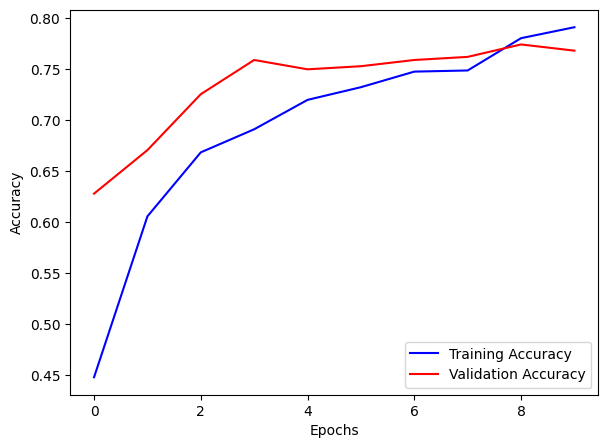

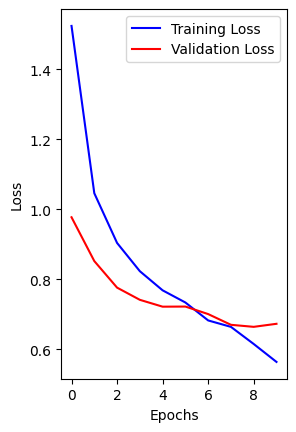

Training Accuracy: 0.7912895679473877
Validation Accuracy: 0.7682926654815674
Training Loss: 0.5643910765647888
Validation Loss: 0.673239529132843


In [8]:
# Building the model

base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(6, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

# Training the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=10, batch_size=32, validation_data=(X_val, y_val))

# saving the model
model.save('aug_densenet121_model.h5')
plt.figure(figsize=(15, 5))

# Plotting the training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


print('Training Accuracy:', history.history['accuracy'][-1])
print('Validation Accuracy:', history.history['val_accuracy'][-1])

print('Training Loss:', history.history['loss'][-1])
print('Validation Loss:', history.history['val_loss'][-1])

# Model with L2 Regularization


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 50s 751ms/step - accuracy: 0.4419 - loss: 1.7147 - val_accuracy: 0.6494 - val_loss: 1.0784
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 38s 682ms/step - accuracy: 0.7251 - loss: 0.8652 - val_accuracy: 0.7256 - val_loss: 0.8436
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 39s 691ms/step - accuracy: 0.7853 - loss: 0.7317 - val_accuracy: 0.7530 - val_loss: 0.8576
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 39s 697ms/step - accuracy: 0.8176 - loss: 0.6245 - val_accuracy: 0.7378 - val_loss: 0.8329
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 39s 702ms/step - accuracy: 0.8332 - loss: 0.6011 - val_accuracy: 0.7713 - val_loss: 0.8112
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 39s 698ms/step - accuracy: 0.8465 - loss: 0.5299 - val_accuracy: 0.7683 - val_loss: 0.7691
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 39s 705ms/step - accuracy: 0.8565 - loss: 0.5142 - val_accuracy: 0.7561 - val_loss: 0.8071
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 39s 692ms/step - accuracy: 0.8560 - loss: 0.5348 - val_accu

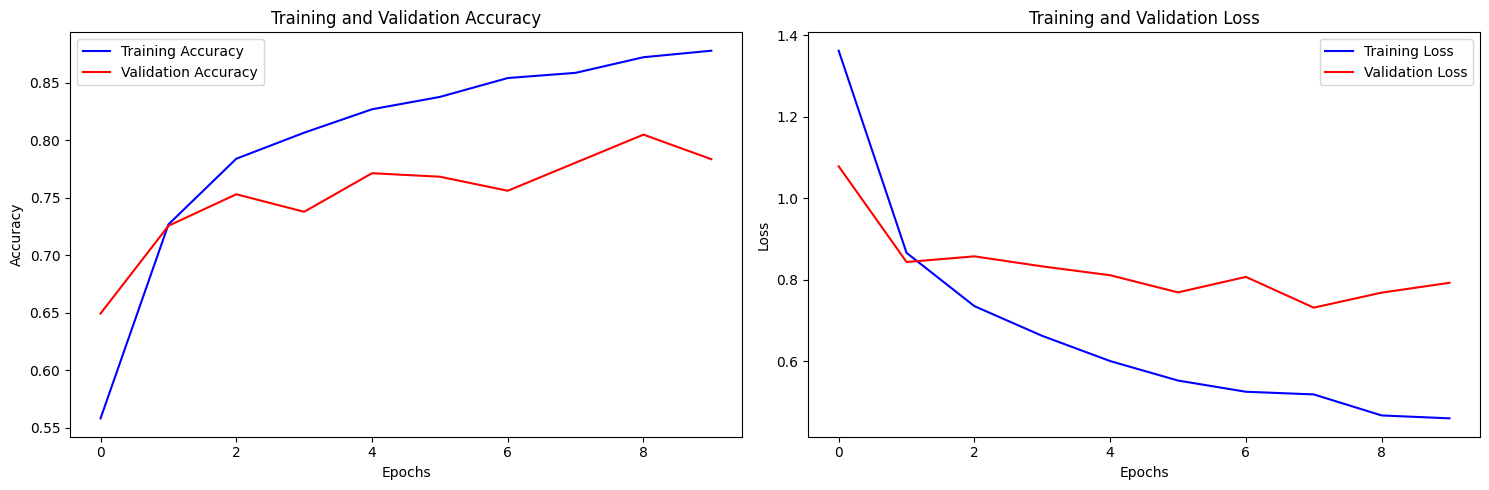

Training Accuracy: 0.877828061580658
Validation Accuracy: 0.7835366129875183
Training Loss: 0.4601311981678009
Validation Loss: 0.7926673889160156


In [9]:

from keras.regularizers import l2

base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(x)
predictions = Dense(6, activation='softmax')(x)
model_l2 = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model_l2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_l2.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=10, batch_size=32, validation_data=(X_val, y_val))
model_l2.save('aug_densenet_model_l2.h5')


# Plotting the training and validation accuracy and loss side by side
plt.figure(figsize=(15, 5))

# Subplot for accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Subplot for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

print('Training Accuracy:', history.history['accuracy'][-1])
print('Validation Accuracy:', history.history['val_accuracy'][-1])

print('Training Loss:', history.history['loss'][-1])
print('Validation Loss:', history.history['val_loss'][-1])

# Model with L1 Regularization


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 50s 737ms/step - accuracy: 0.4476 - loss: 5.4276 - val_accuracy: 0.6890 - val_loss: 3.0376
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 38s 665ms/step - accuracy: 0.7324 - loss: 2.6949 - val_accuracy: 0.7470 - val_loss: 2.3165
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 37s 664ms/step - accuracy: 0.7885 - loss: 2.1411 - val_accuracy: 0.7561 - val_loss: 1.9913
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 37s 661ms/step - accuracy: 0.8090 - loss: 1.8091 - val_accuracy: 0.7348 - val_loss: 1.8485
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 37s 666ms/step - accuracy: 0.8301 - loss: 1.5897 - val_accuracy: 0.7409 - val_loss: 1.6677
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 37s 658ms/step - accuracy: 0.8035 - loss: 1.4485 - val_accuracy: 0.7591 - val_loss: 1.5422
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 37s 663ms/step - accuracy: 0.7997 - loss: 1.3590 - val_accuracy: 0.7622 - val_loss: 1.4031
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 37s 659ms/step - accuracy: 0.8492 - loss: 1.1902 - val_accu

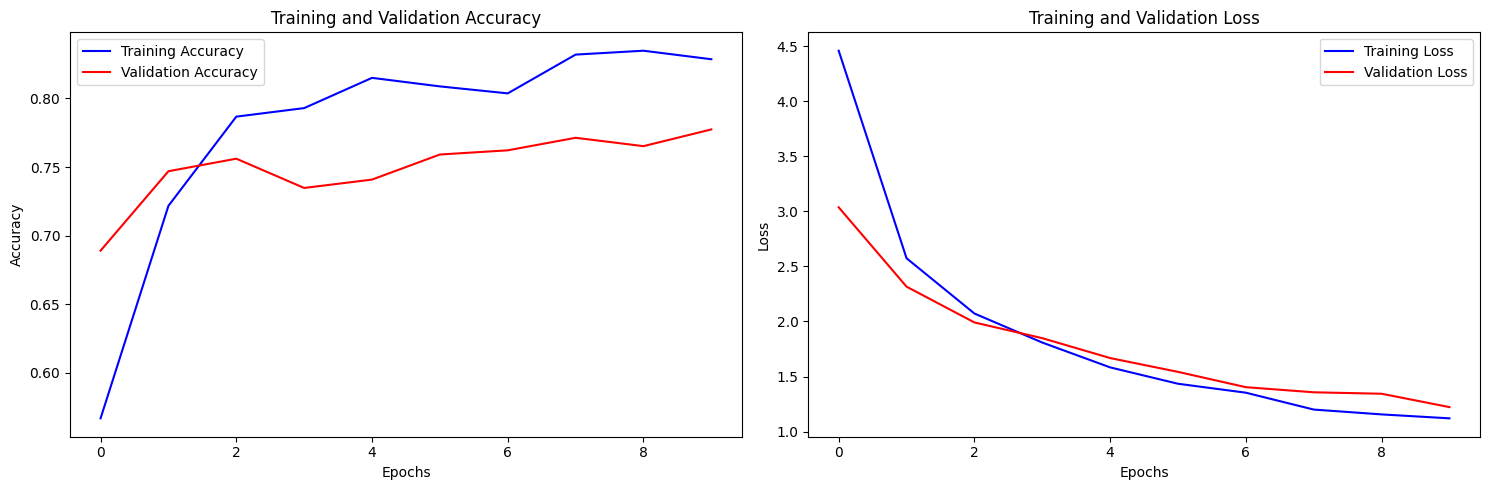

Training Accuracy: 0.8286198973655701
Validation Accuracy: 0.7774389982223511
Training Loss: 1.119911551475525
Validation Loss: 1.2220207452774048


In [10]:

from keras.regularizers import l1

base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu', kernel_regularizer=l1(0.001))(x)
predictions = Dense(6, activation='softmax')(x)
model_l1 = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model_l1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_l1.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=10, batch_size=32, validation_data=(X_val, y_val))
model_l1.save('aug_densenet_model_l1.h5')

# Plotting the training and validation accuracy and loss side by side
plt.figure(figsize=(15, 5))

# Subplot for accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Subplot for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

print('Training Accuracy:', history.history['accuracy'][-1])
print('Validation Accuracy:', history.history['val_accuracy'][-1])

print('Training Loss:', history.history['loss'][-1])
print('Validation Loss:', history.history['val_loss'][-1])

# Model with Dropout Only (baseline already similar)


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 47s 674ms/step - accuracy: 0.3578 - loss: 1.9359 - val_accuracy: 0.6250 - val_loss: 0.9741
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 34s 622ms/step - accuracy: 0.6007 - loss: 1.0227 - val_accuracy: 0.7134 - val_loss: 0.8390
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 34s 609ms/step - accuracy: 0.6506 - loss: 0.9462 - val_accuracy: 0.7256 - val_loss: 0.7656
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 34s 611ms/step - accuracy: 0.7137 - loss: 0.8192 - val_accuracy: 0.7470 - val_loss: 0.7233
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 34s 612ms/step - accuracy: 0.7261 - loss: 0.7567 - val_accuracy: 0.7683 - val_loss: 0.6956
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 35s 620ms/step - accuracy: 0.7412 - loss: 0.6978 - val_accuracy: 0.7683 - val_loss: 0.6693
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 35s 619ms/step - accuracy: 0.7777 - loss: 0.6381 - val_accuracy: 0.7927 - val_loss: 0.6451
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 34s 614ms/step - accuracy: 0.7617 - loss: 0.6467 - val_accu

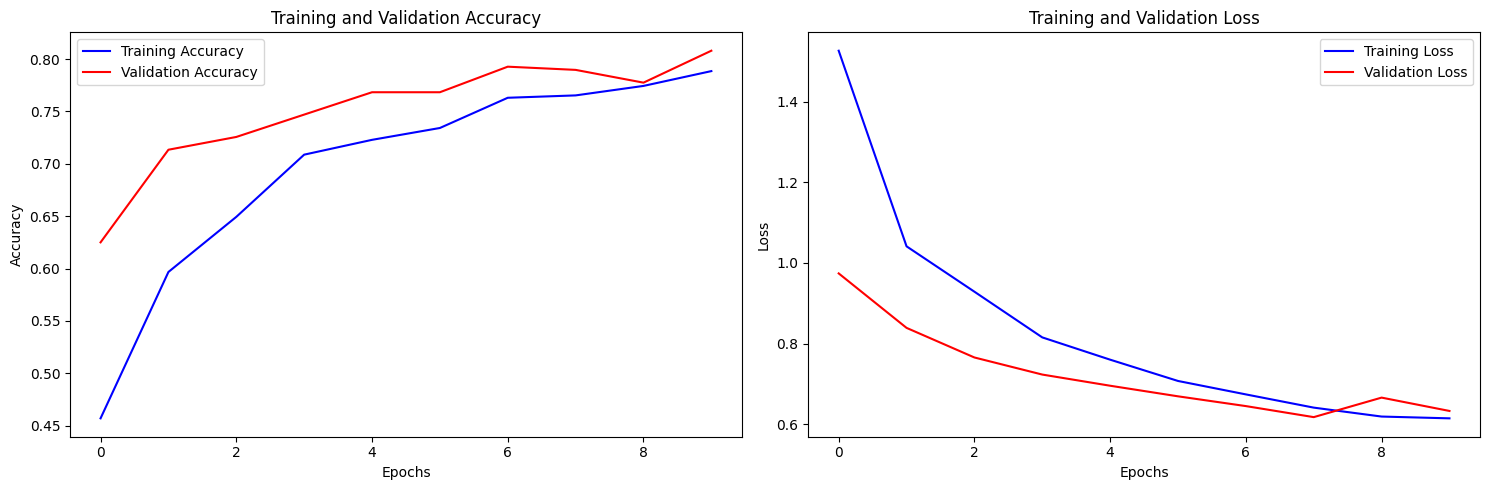

Training Accuracy: 0.7884615659713745
Validation Accuracy: 0.8079268336296082
Training Loss: 0.6147369742393494
Validation Loss: 0.6330534219741821


In [11]:

base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(6, activation='softmax')(x)
model_dropout = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model_dropout.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_dropout.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=10, batch_size=32, validation_data=(X_val, y_val))
model_dropout.save('aug_densenet_model_dropout.h5')

# Plotting the training and validation accuracy and loss side by side
plt.figure(figsize=(15, 5))

# Subplot for accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Subplot for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

print('Training Accuracy:', history.history['accuracy'][-1])
print('Validation Accuracy:', history.history['val_accuracy'][-1])

print('Training Loss:', history.history['loss'][-1])
print('Validation Loss:', history.history['val_loss'][-1])

# Model with EarlyStopping Only


Epoch 1/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 47s 707ms/step - accuracy: 0.4755 - loss: 1.3875 - val_accuracy: 0.7073 - val_loss: 0.8039
Epoch 2/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 35s 619ms/step - accuracy: 0.7264 - loss: 0.7423 - val_accuracy: 0.7530 - val_loss: 0.6961
Epoch 3/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 35s 626ms/step - accuracy: 0.7721 - loss: 0.6313 - val_accuracy: 0.7530 - val_loss: 0.7433
Epoch 4/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 35s 620ms/step - accuracy: 0.7893 - loss: 0.5662 - val_accuracy: 0.7622 - val_loss: 0.6979
Epoch 5/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 35s 618ms/step - accuracy: 0.8450 - loss: 0.4647 - val_accuracy: 0.7896 - val_loss: 0.7110


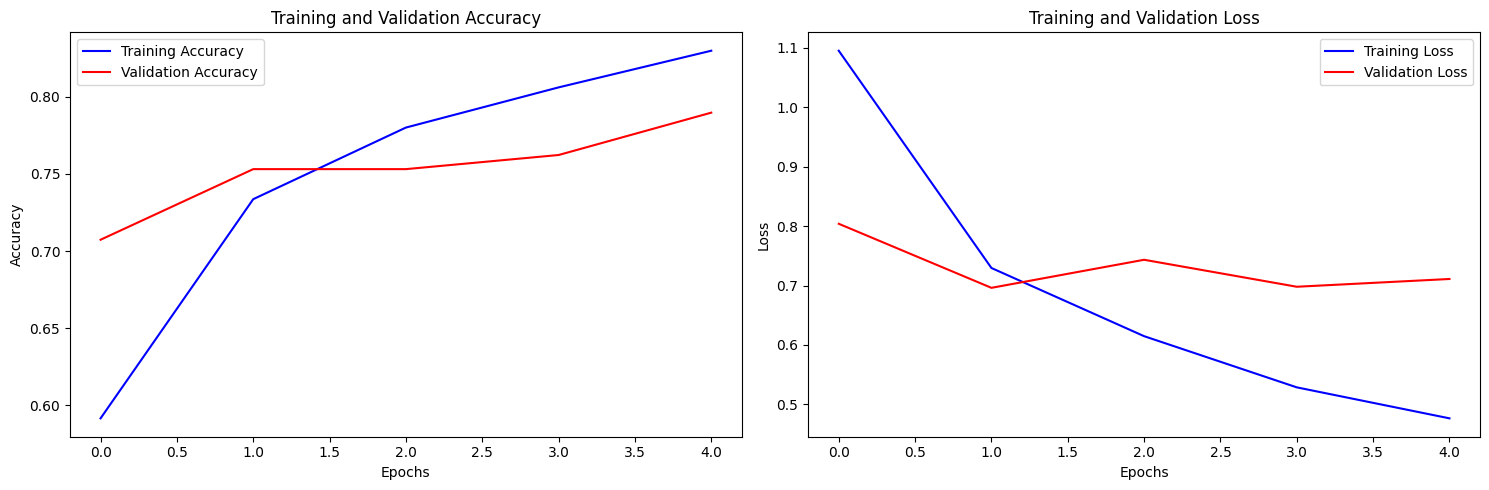

Training Accuracy: 0.8297511339187622
Validation Accuracy: 0.7896341681480408
Training Loss: 0.4764958620071411
Validation Loss: 0.7109916806221008


In [12]:

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(6, activation='softmax')(x)
model_es = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model_es.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_es.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=30, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stop])
model_es.save('aug_densenet_model_es.h5')

# Plotting the training and validation accuracy and loss side by side
plt.figure(figsize=(15, 5))

# Subplot for accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Subplot for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

print('Training Accuracy:', history.history['accuracy'][-1])
print('Validation Accuracy:', history.history['val_accuracy'][-1])

print('Training Loss:', history.history['loss'][-1])
print('Validation Loss:', history.history['val_loss'][-1])

# Model with Dropout + EarlyStopping


Epoch 1/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 45s 662ms/step - accuracy: 0.3404 - loss: 1.8596 - val_accuracy: 0.6555 - val_loss: 0.9418
Epoch 2/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 34s 608ms/step - accuracy: 0.6016 - loss: 1.0568 - val_accuracy: 0.7256 - val_loss: 0.8034
Epoch 3/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 34s 606ms/step - accuracy: 0.6490 - loss: 0.9159 - val_accuracy: 0.7409 - val_loss: 0.7116
Epoch 4/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 34s 611ms/step - accuracy: 0.7199 - loss: 0.7927 - val_accuracy: 0.7439 - val_loss: 0.6649
Epoch 5/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 34s 610ms/step - accuracy: 0.7249 - loss: 0.7218 - val_accuracy: 0.7713 - val_loss: 0.6495
Epoch 6/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 34s 611ms/step - accuracy: 0.7360 - loss: 0.7116 - val_accuracy: 0.7713 - val_loss: 0.6428
Epoch 7/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 34s 612ms/step - accuracy: 0.7478 - loss: 0.6656 - val_accuracy: 0.7470 - val_loss: 0.6457
Epoch 8/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 34s 613ms/step - accuracy: 0.7556 - loss: 0.6309 - val_accu

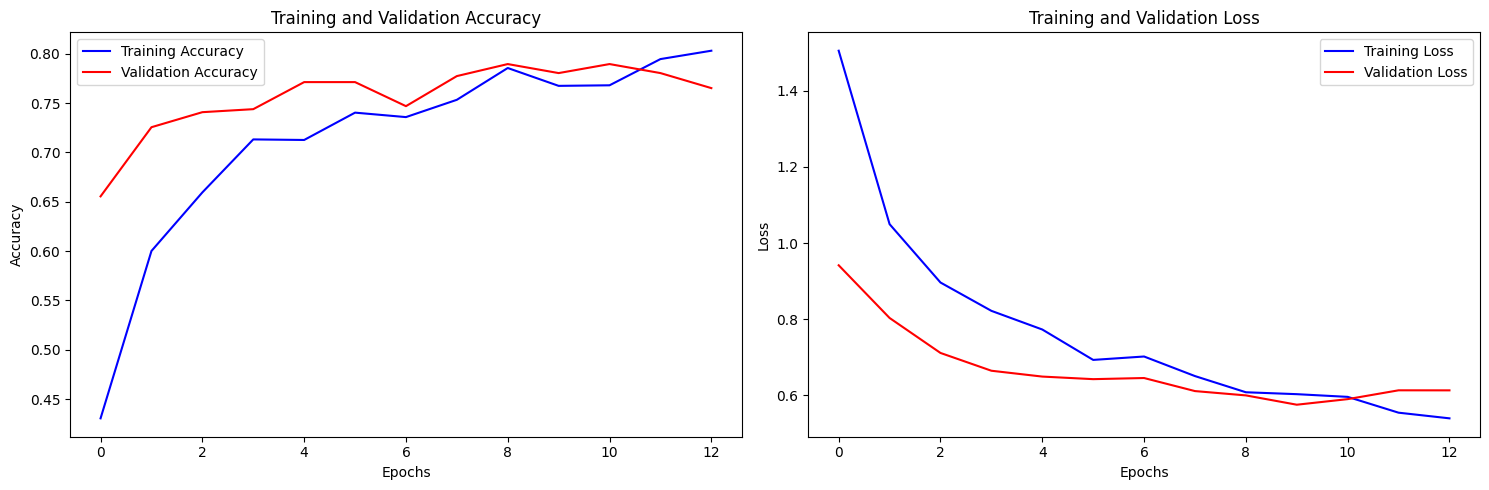

Training Accuracy: 0.8031674027442932
Validation Accuracy: 0.7652438879013062
Training Loss: 0.5398364067077637
Validation Loss: 0.6133294701576233


In [13]:

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(6, activation='softmax')(x)
model_de = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model_de.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_de.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=30, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stop])
model_de.save('aug_densenet_model_de.h5')

# Plotting the training and validation accuracy and loss side by side
plt.figure(figsize=(15, 5))

# Subplot for accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Subplot for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

print('Training Accuracy:', history.history['accuracy'][-1])
print('Validation Accuracy:', history.history['val_accuracy'][-1])

print('Training Loss:', history.history['loss'][-1])
print('Validation Loss:', history.history['val_loss'][-1])

# Comparing with test accuracy

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    f1_score, precision_score, recall_score,
    accuracy_score, roc_curve, auc,
    classification_report, confusion_matrix
)

def evaluate_model(predictions, y_true, class_names):
    # F1 Score
    f1 = f1_score(np.argmax(y_true, axis=1), np.argmax(predictions, axis=1), average='weighted')
    print("F1 Score: ", f1)

    # Precision
    precision = precision_score(np.argmax(y_true, axis=1), np.argmax(predictions, axis=1), average='weighted')
    print("Precision: ", precision)

    # Recall
    recall = recall_score(np.argmax(y_true, axis=1), np.argmax(predictions, axis=1), average='weighted')
    print("Recall: ", recall)

    # Accuracy
    accuracy = accuracy_score(np.argmax(y_true, axis=1), np.argmax(predictions, axis=1))
    print("Accuracy: ", accuracy)

    # Compute ROC curve and AUC
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(class_names)):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], predictions[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Confusion Matrix
    cm = confusion_matrix(np.argmax(y_true, axis=1), np.argmax(predictions, axis=1))

    # Plot ROC + Confusion Matrix in one figure
    fig, axes = plt.subplots(1, 2, figsize=(18, 7))

    # ROC Curve Plot
    for i in range(len(class_names)):
        axes[0].plot(fpr[i], tpr[i], label=class_names[i] + f' (AUC = {roc_auc[i]:.2f})')
    axes[0].plot([0, 1], [0, 1], 'k--')
    axes[0].set_title('ROC Curve')
    axes[0].set_xlabel('False Positive Rate')
    axes[0].set_ylabel('True Positive Rate')
    axes[0].legend()

    # Confusion Matrix Plot
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names, ax=axes[1])
    axes[1].set_title('Confusion Matrix')
    axes[1].set_xlabel('Predicted')
    axes[1].set_ylabel('Actual')

    plt.tight_layout()
    plt.show()

    # Classification Report
    print(classification_report(np.argmax(y_true, axis=1), np.argmax(predictions, axis=1), target_names=class_names))



Loading the model



Evaluating the model


2025-04-01 00:35:22.074294: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 116370000 exceeds 10% of free system memory.


14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 651ms/step


2025-04-01 00:35:33.468474: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 116370000 exceeds 10% of free system memory.


14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 491ms/step - accuracy: 0.8531 - loss: 0.4659
Test Loss: 0.6408665180206299
Test Accuracy: 0.7888631224632263
F1 Score:  0.7832660418158468
Precision:  0.809592334677282
Recall:  0.7888631090487239
Accuracy:  0.7888631090487239


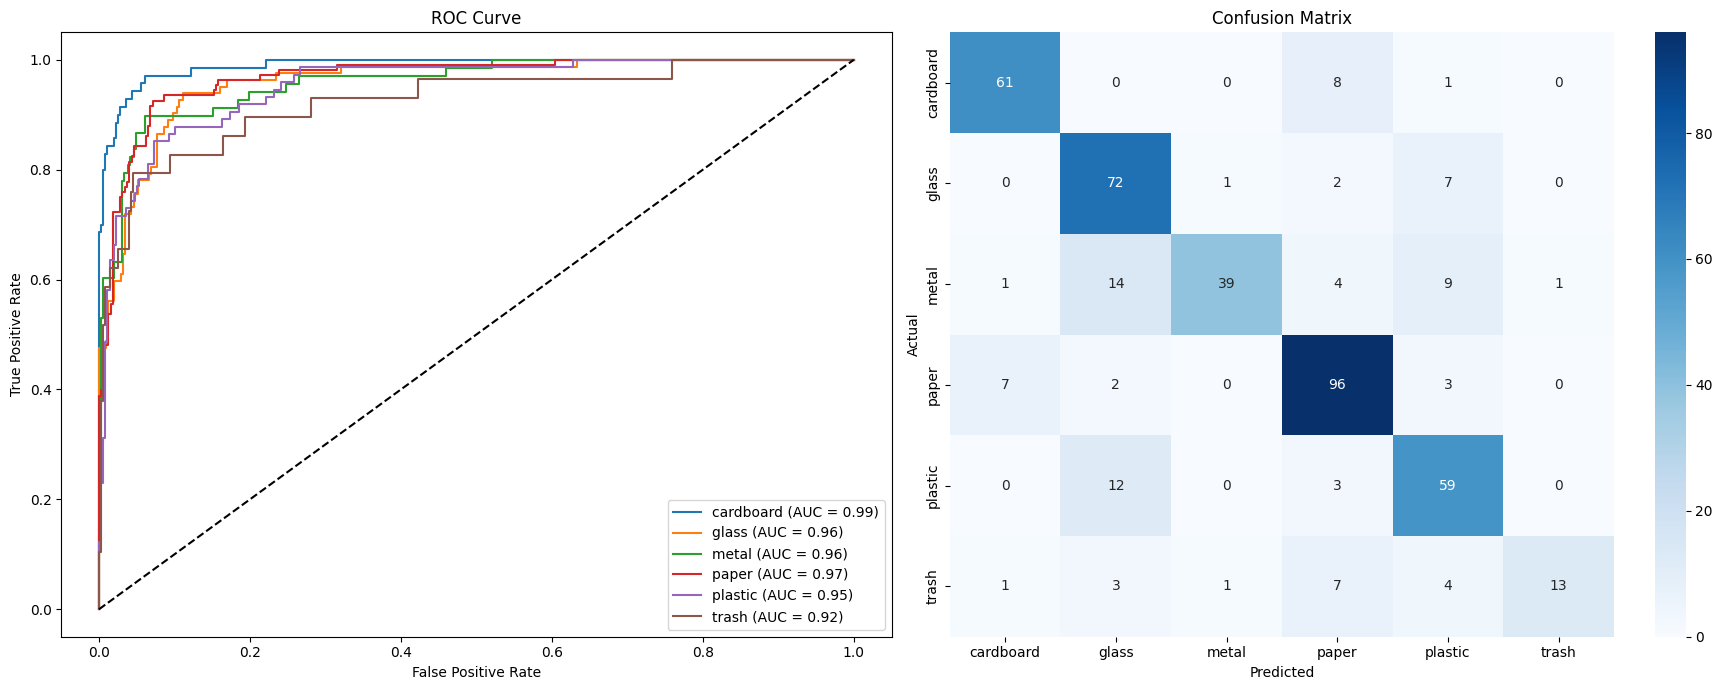

              precision    recall  f1-score   support

   cardboard       0.87      0.87      0.87        70
       glass       0.70      0.88      0.78        82
       metal       0.95      0.57      0.72        68
       paper       0.80      0.89      0.84       108
     plastic       0.71      0.80      0.75        74
       trash       0.93      0.45      0.60        29

    accuracy                           0.79       431
   macro avg       0.83      0.74      0.76       431
weighted avg       0.81      0.79      0.78       431


Evaluating the model


2025-04-01 00:35:45.330368: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 116370000 exceeds 10% of free system memory.


14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 659ms/step


2025-04-01 00:35:56.693286: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 116370000 exceeds 10% of free system memory.


14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 492ms/step - accuracy: 0.8682 - loss: 0.5431
Test Loss: 0.6485108733177185
Test Accuracy: 0.8236659169197083
F1 Score:  0.8206462812856294
Precision:  0.8274295423345502
Recall:  0.8236658932714617
Accuracy:  0.8236658932714617


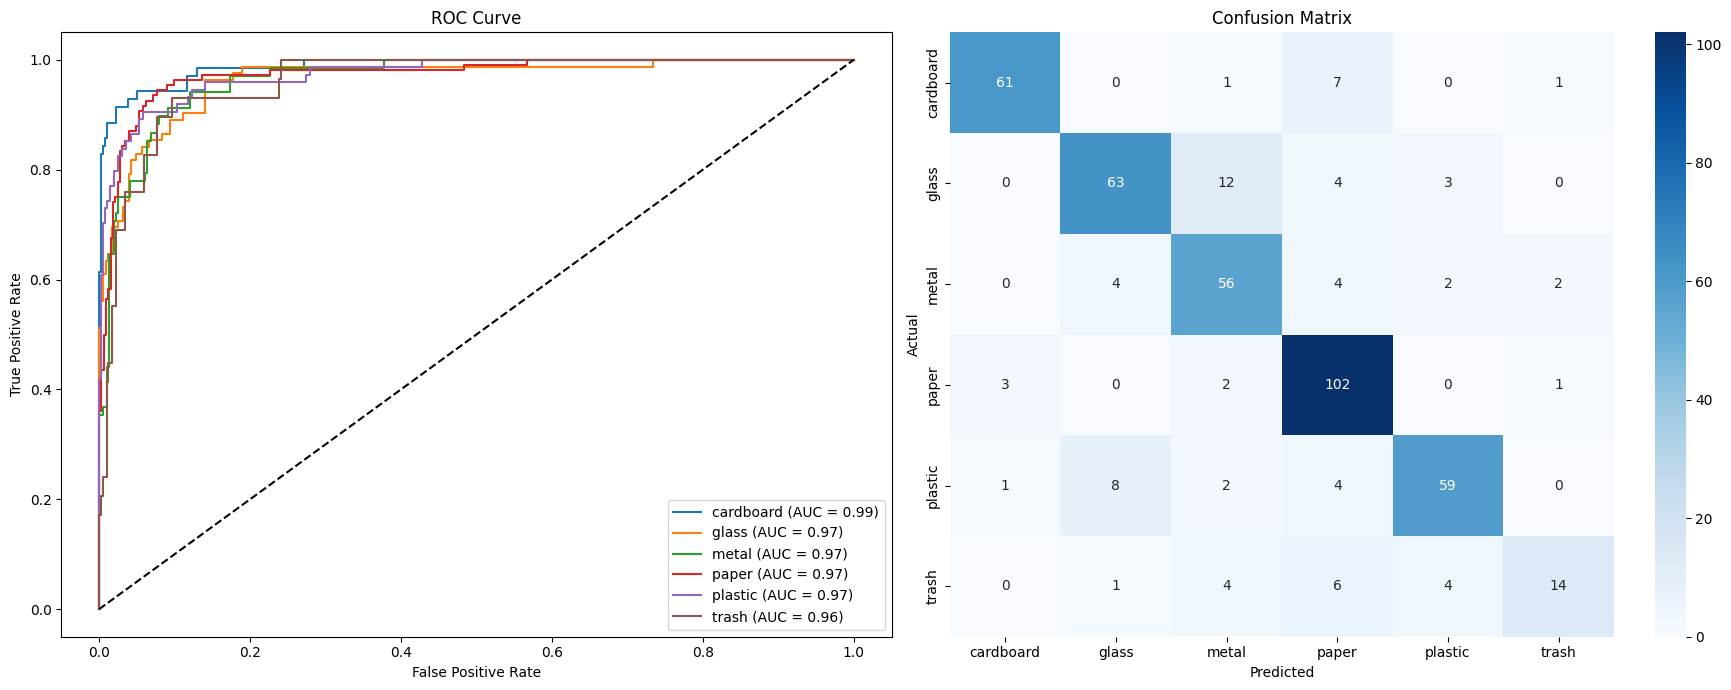

              precision    recall  f1-score   support

   cardboard       0.94      0.87      0.90        70
       glass       0.83      0.77      0.80        82
       metal       0.73      0.82      0.77        68
       paper       0.80      0.94      0.87       108
     plastic       0.87      0.80      0.83        74
       trash       0.78      0.48      0.60        29

    accuracy                           0.82       431
   macro avg       0.82      0.78      0.79       431
weighted avg       0.83      0.82      0.82       431


Evaluating the model


2025-04-01 00:36:08.500192: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 116370000 exceeds 10% of free system memory.


14/14 ━━━━━━━━━━━━━━━━━━━━ 13s 676ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 504ms/step - accuracy: 0.8358 - loss: 1.0882
Test Loss: 1.2189836502075195
Test Accuracy: 0.781902551651001
F1 Score:  0.7758366803910262
Precision:  0.7976473241095122
Recall:  0.7819025522041764
Accuracy:  0.7819025522041764


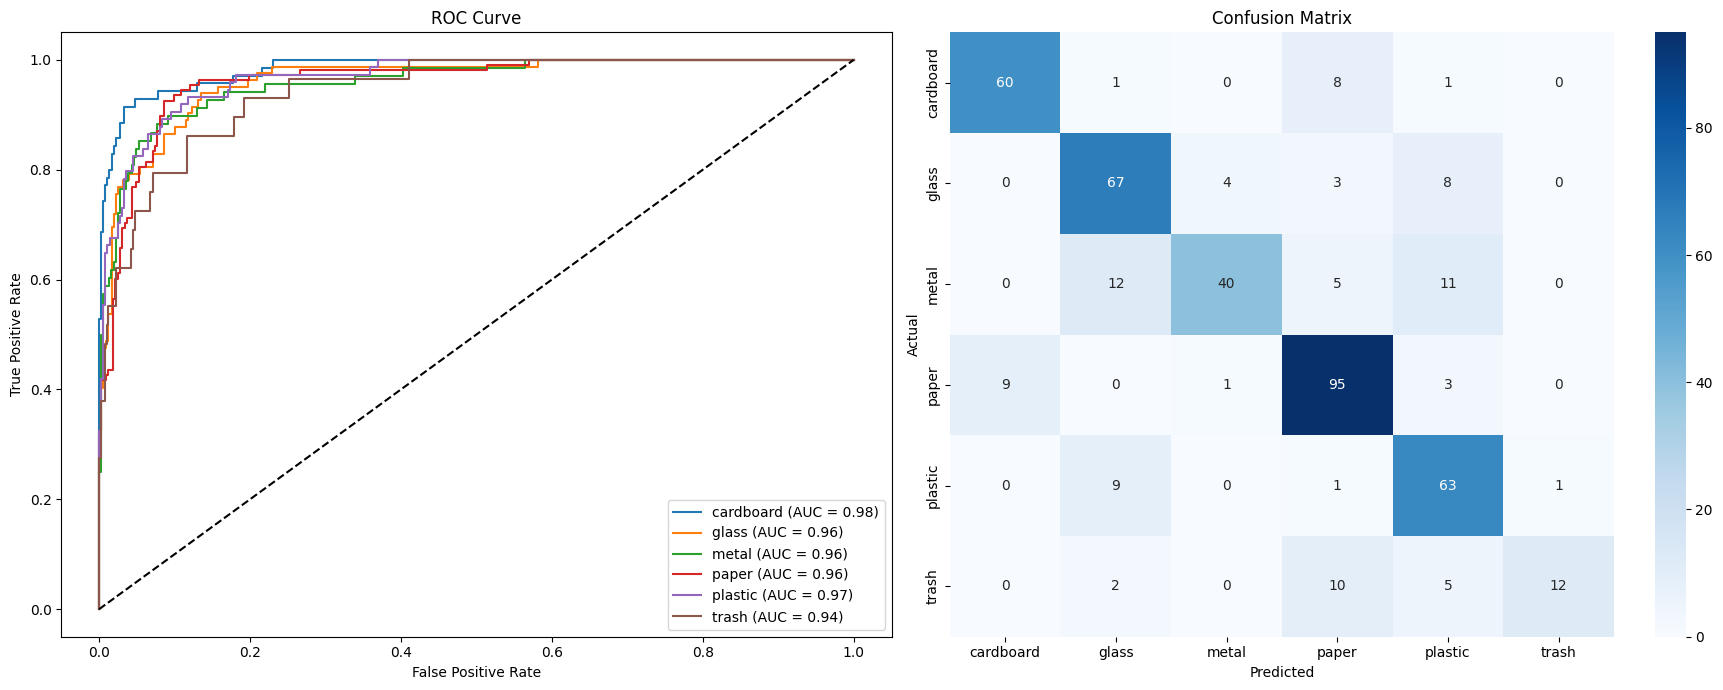

              precision    recall  f1-score   support

   cardboard       0.87      0.86      0.86        70
       glass       0.74      0.82      0.77        82
       metal       0.89      0.59      0.71        68
       paper       0.78      0.88      0.83       108
     plastic       0.69      0.85      0.76        74
       trash       0.92      0.41      0.57        29

    accuracy                           0.78       431
   macro avg       0.81      0.73      0.75       431
weighted avg       0.80      0.78      0.78       431


Evaluating the model
14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 668ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 493ms/step - accuracy: 0.8491 - loss: 0.4897
Test Loss: 0.5522390007972717
Test Accuracy: 0.8306264281272888
F1 Score:  0.828374724210553
Precision:  0.8347025029974995
Recall:  0.8306264501160093
Accuracy:  0.8306264501160093


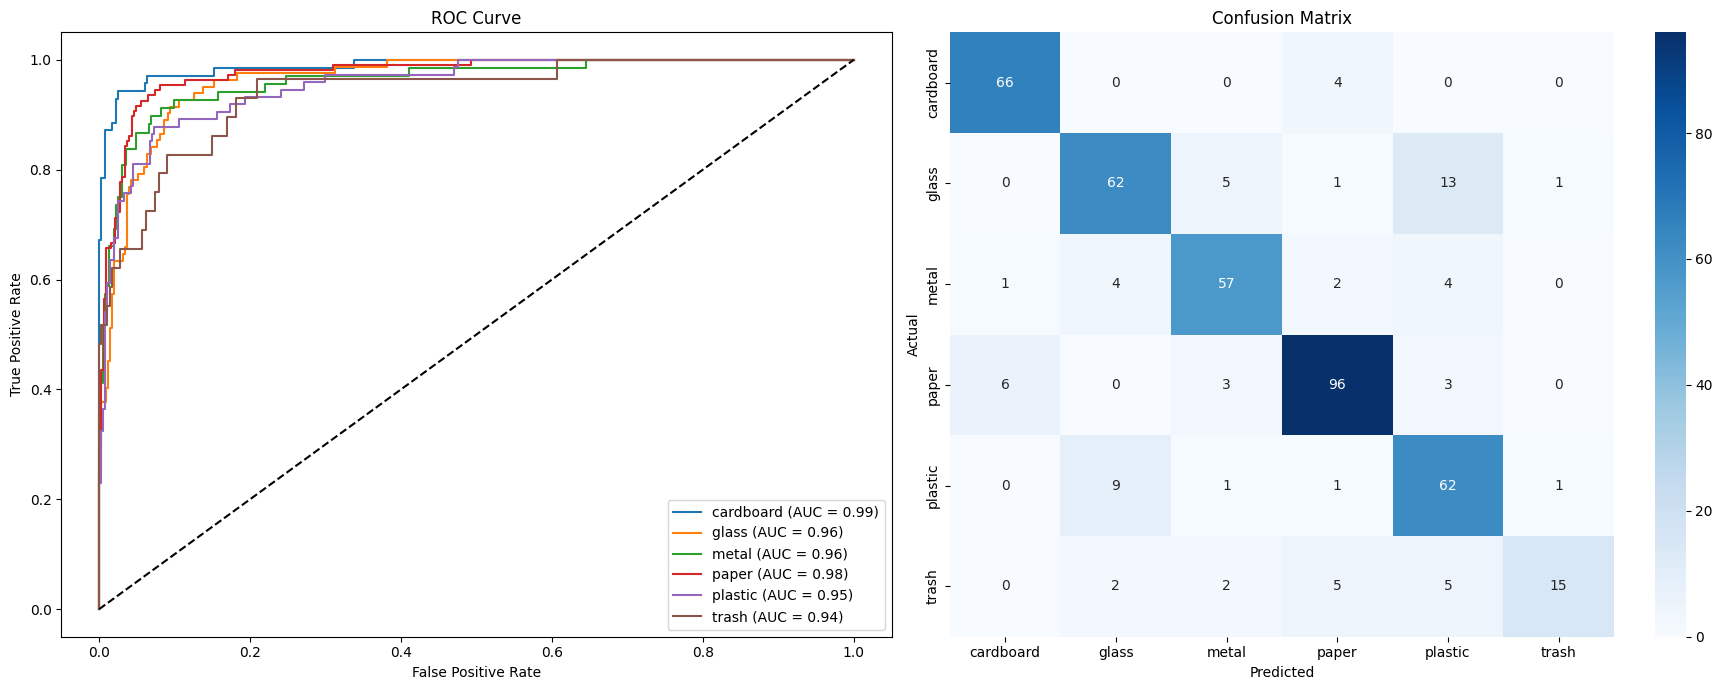

              precision    recall  f1-score   support

   cardboard       0.90      0.94      0.92        70
       glass       0.81      0.76      0.78        82
       metal       0.84      0.84      0.84        68
       paper       0.88      0.89      0.88       108
     plastic       0.71      0.84      0.77        74
       trash       0.88      0.52      0.65        29

    accuracy                           0.83       431
   macro avg       0.84      0.80      0.81       431
weighted avg       0.83      0.83      0.83       431


Evaluating the model
14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 666ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 500ms/step - accuracy: 0.8414 - loss: 0.5448
Test Loss: 0.6626074314117432
Test Accuracy: 0.7749419808387756
F1 Score:  0.7711456327233843
Precision:  0.7857961830152059
Recall:  0.7749419953596288
Accuracy:  0.7749419953596288


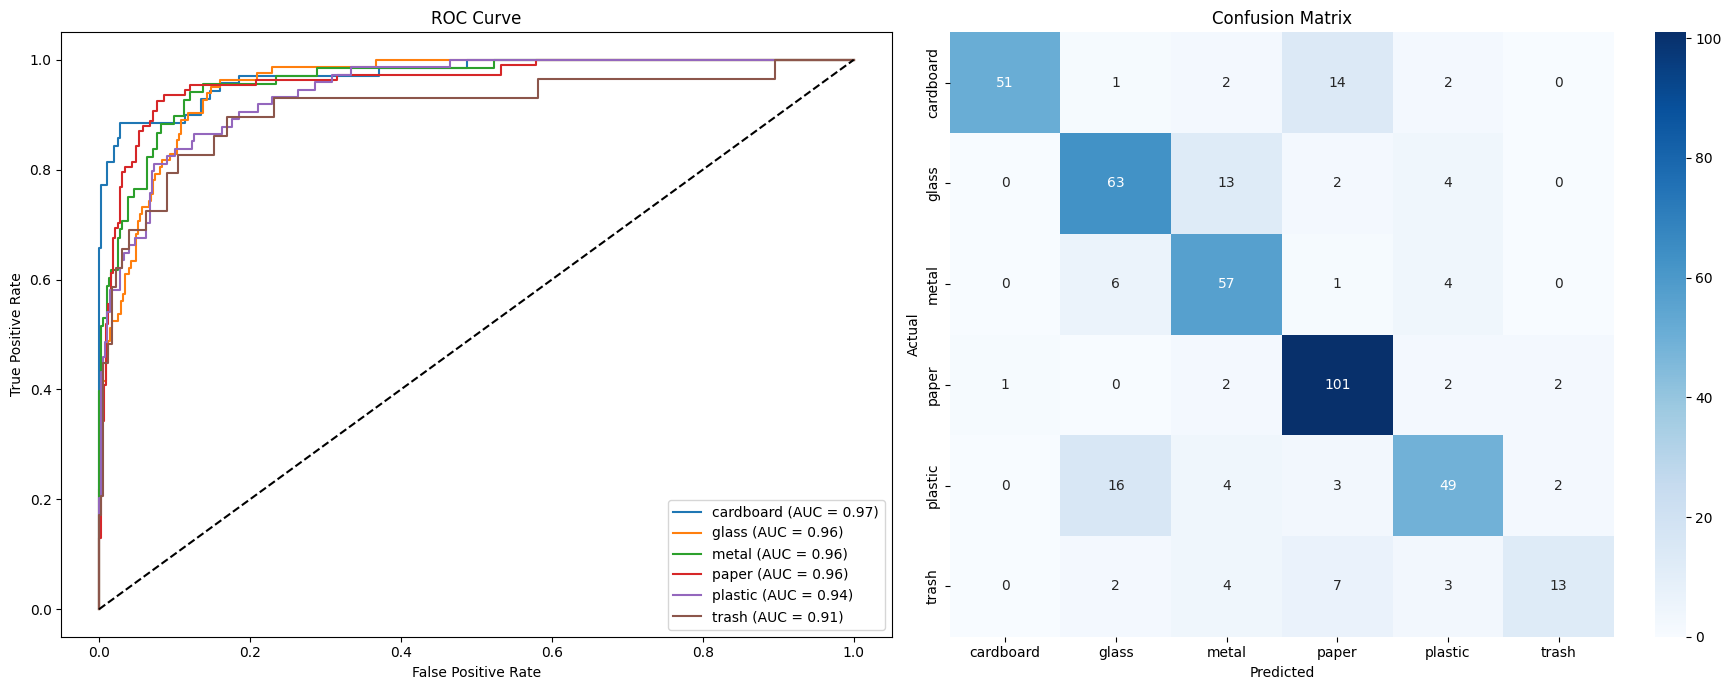

              precision    recall  f1-score   support

   cardboard       0.98      0.73      0.84        70
       glass       0.72      0.77      0.74        82
       metal       0.70      0.84      0.76        68
       paper       0.79      0.94      0.86       108
     plastic       0.77      0.66      0.71        74
       trash       0.76      0.45      0.57        29

    accuracy                           0.77       431
   macro avg       0.79      0.73      0.74       431
weighted avg       0.79      0.77      0.77       431


Evaluating the model
14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 668ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 497ms/step - accuracy: 0.8210 - loss: 0.4872
Test Loss: 0.5738696455955505
Test Accuracy: 0.79350346326828
F1 Score:  0.7918715819456293
Precision:  0.7961708511959321
Recall:  0.7935034802784223
Accuracy:  0.7935034802784223


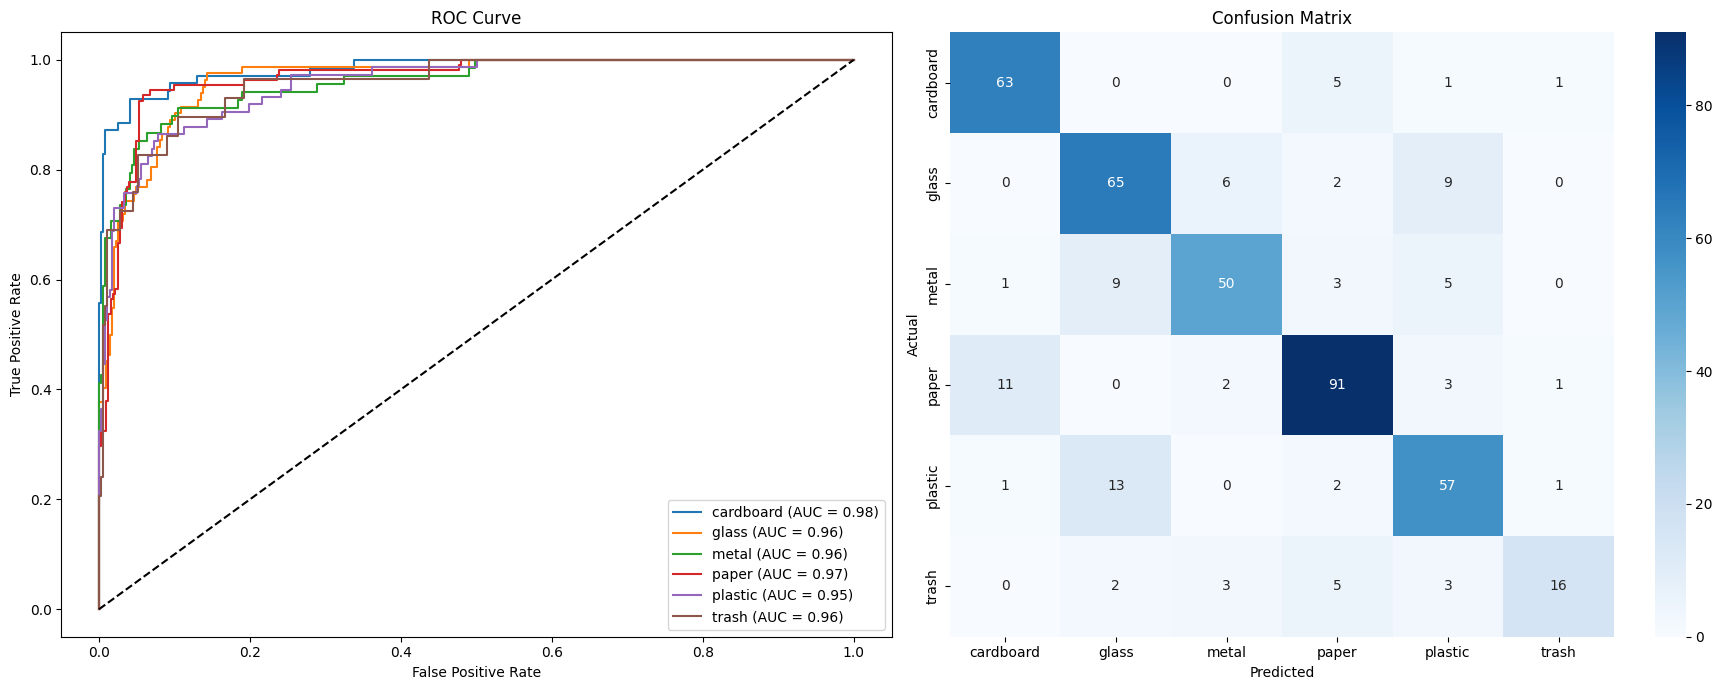

              precision    recall  f1-score   support

   cardboard       0.83      0.90      0.86        70
       glass       0.73      0.79      0.76        82
       metal       0.82      0.74      0.78        68
       paper       0.84      0.84      0.84       108
     plastic       0.73      0.77      0.75        74
       trash       0.84      0.55      0.67        29

    accuracy                           0.79       431
   macro avg       0.80      0.77      0.78       431
weighted avg       0.80      0.79      0.79       431



In [15]:
# Loading the model ADAM
from keras.models import load_model

print("\nLoading the model")
model = load_model('aug_densenet121_model.h5')
model_l2 = load_model('aug_densenet_model_l2.h5')
model_l1 = load_model('aug_densenet_model_l1.h5')
model_dropout = load_model('aug_densenet_model_dropout.h5')
model_es = load_model('aug_densenet_model_es.h5')
model_de = load_model('aug_densenet_model_de.h5')

for m in [model, model_l2, model_l1, model_dropout, model_es, model_de]:
    print("\nEvaluating the model")
    predictions = m.predict(X_test)
    loss, accuracy = m.evaluate(X_test, y_test)
    print('Test Loss:', loss)
    print('Test Accuracy:', accuracy)
    evaluate_model(predictions, y_test, classes_names)

In [16]:
# Function to displaying random predictions from the dataset with their images and predictions

def display_random_predictions(X, y, predictions, classes_names, number_of_predictions=5):
    plt.figure(figsize=(15, 20))

    for class_name in classes_names:
        for i in range(number_of_predictions):
            index = np.random.choice(np.where(y == class_name)[0])
            plt.subplot(len(classes_names), number_of_predictions, number_of_predictions * list(classes_names).index(class_name) + i + 1)
            plt.imshow(X[index])
            plt.title("Actual: " + class_name + "\nPredicted: " + label_encoder.classes_[np.argmax(predictions[index])])
            plt.axis('off')
    
    plt.show()

display_random_predictions(X_test, y_test, predictions, classes_names)

ValueError: 'a' cannot be empty unless no samples are taken

<Figure size 1500x2000 with 0 Axes>